In [1]:
import numpy as np

In [2]:
from keras.preprocessing.image import  array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray
from skimage.io import imsave

Using TensorFlow backend.


In [89]:
x = []
y = []

In [90]:
for i in range(1,100):
    x.append(img_to_array(load_img("train/{}_128.jpg".format(i))))

In [91]:
x[0].shape

(128, 128, 3)

In [92]:
X = np.array(x, dtype=float)

In [93]:
x = []
y = []
for im in X:
    a = rgb2lab(1.0/255*im)[:,:,0]
    b = rgb2lab(1.0/255*im)[:,:,1:]
    b /= 128
    a = a.reshape(128, 128, 1)
    b = b.reshape(128*128*2)
    x.append(a)
    y.append(b)

In [94]:
x = np.array(x)
y = np.array(y)

In [95]:
y.shape

(99, 32768)

In [96]:
from keras.layers import Conv2D, Conv2DTranspose, UpSampling2D
from keras.layers import Activation, Dense, Dropout, Flatten, InputLayer,MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.callbacks import TensorBoard
from keras.models import Sequential

In [97]:
img_cols = 128
img_rows = 128
input_shape = (img_rows, img_cols, 1)

In [98]:


model = Sequential()
model.add(Conv2D(16, (5, 5),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (4, 4),activation='relu',input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(32, (4, 4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (4, 4), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(y.shape[1], activation='linear'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 124, 124, 16)      416       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 59, 59, 16)        4112      
_________________________________________________________________
batch_normalization_7 (Batch (None, 59, 59, 16)        64        
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 29, 29, 16)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 26, 26, 32)        8224      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 32)        0         
__________

In [100]:
model.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [151]:
batch_size = 10
epochs = 400
model.fit(x, y,batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/400
99/99 [==============================] - 1s 13ms/step - loss: 0.0046 - acc: 0.0404
Epoch 2/400
99/99 [==============================] - 1s 13ms/step - loss: 0.0040 - acc: 0.0303
Epoch 3/400
99/99 [==============================] - 1s 13ms/step - loss: 0.0037 - acc: 0.0202
Epoch 4/400
99/99 [==============================] - 1s 13ms/step - loss: 0.0039 - acc: 0.0303
Epoch 5/400
99/99 [==============================] - 1s 13ms/step - loss: 0.0037 - acc: 0.0101
Epoch 6/400
99/99 [==============================] - 1s 13ms/step - loss: 0.0038 - acc: 0.0303
Epoch 7/400
99/99 [==============================] - 1s 13ms/step - loss: 0.0038 - acc: 0.0202
Epoch 8/400
99/99 [==============================] - 1s 14ms/step - loss: 0.0037 - acc: 0.0303
Epoch 9/400
99/99 [==============================] - 1s 13ms/step - loss: 0.0038 - acc: 0.0404
Epoch 10/400
99/99 [==============================] - 1s 14ms/step - loss: 0.0039 - acc: 0.0303
Epoch 11/400
99/99 [=============================

99/99 [==============================] - 1s 13ms/step - loss: 0.0032 - acc: 0.0404
Epoch 87/400
99/99 [==============================] - 1s 13ms/step - loss: 0.0032 - acc: 0.0202
Epoch 88/400
99/99 [==============================] - 1s 13ms/step - loss: 0.0031 - acc: 0.0606
Epoch 89/400
99/99 [==============================] - 1s 13ms/step - loss: 0.0031 - acc: 0.0202
Epoch 90/400
99/99 [==============================] - 1s 13ms/step - loss: 0.0037 - acc: 0.0606
Epoch 91/400
99/99 [==============================] - 1s 13ms/step - loss: 0.0037 - acc: 0.0505
Epoch 92/400
99/99 [==============================] - 1s 13ms/step - loss: 0.0034 - acc: 0.0303
Epoch 93/400
99/99 [==============================] - 1s 13ms/step - loss: 0.0035 - acc: 0.0202
Epoch 94/400
99/99 [==============================] - 1s 14ms/step - loss: 0.0039 - acc: 0.0303
Epoch 95/400
99/99 [==============================] - 1s 14ms/step - loss: 0.0036 - acc: 0.0202
Epoch 96/400
99/99 [==============================] -

99/99 [==============================] - 1s 13ms/step - loss: 0.0033 - acc: 0.0202
Epoch 171/400
99/99 [==============================] - 1s 13ms/step - loss: 0.0034 - acc: 0.0303
Epoch 172/400
99/99 [==============================] - 1s 13ms/step - loss: 0.0033 - acc: 0.0303
Epoch 173/400
99/99 [==============================] - 1s 13ms/step - loss: 0.0027 - acc: 0.0202
Epoch 174/400
99/99 [==============================] - 1s 13ms/step - loss: 0.0032 - acc: 0.0303
Epoch 175/400
99/99 [==============================] - 1s 13ms/step - loss: 0.0031 - acc: 0.0202
Epoch 176/400
99/99 [==============================] - 1s 13ms/step - loss: 0.0028 - acc: 0.0202
Epoch 177/400
99/99 [==============================] - 1s 13ms/step - loss: 0.0031 - acc: 0.0303
Epoch 178/400
99/99 [==============================] - 1s 13ms/step - loss: 0.0030 - acc: 0.0202
Epoch 179/400
99/99 [==============================] - 1s 13ms/step - loss: 0.0030 - acc: 0.0202
Epoch 180/400
99/99 [=======================

99/99 [==============================] - 1s 15ms/step - loss: 0.0031 - acc: 0.0404
Epoch 255/400
99/99 [==============================] - 2s 15ms/step - loss: 0.0029 - acc: 0.0404
Epoch 256/400
99/99 [==============================] - 2s 17ms/step - loss: 0.0040 - acc: 0.0202
Epoch 257/400
99/99 [==============================] - 2s 17ms/step - loss: 0.0032 - acc: 0.0202
Epoch 258/400
99/99 [==============================] - 2s 17ms/step - loss: 0.0037 - acc: 0.0202
Epoch 259/400
99/99 [==============================] - 2s 17ms/step - loss: 0.0029 - acc: 0.0303
Epoch 260/400
99/99 [==============================] - 2s 18ms/step - loss: 0.0038 - acc: 0.0505
Epoch 261/400
99/99 [==============================] - 2s 16ms/step - loss: 0.0034 - acc: 0.0303
Epoch 262/400
99/99 [==============================] - 2s 16ms/step - loss: 0.0034 - acc: 0.0000e+00
Epoch 263/400
99/99 [==============================] - 2s 19ms/step - loss: 0.0038 - acc: 0.0101
Epoch 264/400
99/99 [===================

99/99 [==============================] - 1s 14ms/step - loss: 0.0033 - acc: 0.0202
Epoch 339/400
99/99 [==============================] - 1s 14ms/step - loss: 0.0034 - acc: 0.0101
Epoch 340/400
99/99 [==============================] - 2s 16ms/step - loss: 0.0028 - acc: 0.0404
Epoch 341/400
99/99 [==============================] - 1s 14ms/step - loss: 0.0034 - acc: 0.0101
Epoch 342/400
99/99 [==============================] - 1s 15ms/step - loss: 0.0033 - acc: 0.0303
Epoch 343/400
99/99 [==============================] - 1s 15ms/step - loss: 0.0028 - acc: 0.0101
Epoch 344/400
99/99 [==============================] - 2s 15ms/step - loss: 0.0035 - acc: 0.0202
Epoch 345/400
99/99 [==============================] - 1s 15ms/step - loss: 0.0033 - acc: 0.0303
Epoch 346/400
99/99 [==============================] - 1s 14ms/step - loss: 0.0036 - acc: 0.0303
Epoch 347/400
99/99 [==============================] - 2s 17ms/step - loss: 0.0032 - acc: 0.0303
Epoch 348/400
99/99 [=======================

In [152]:
model.save_weights("nayababamin.hdf5")

In [173]:
t = img_to_array(load_img("1184_128.jpg"))

In [174]:
t =rgb2lab(1.0/255*t)[:,:,0]

In [175]:
t = t.reshape(1,128,128,1)

In [176]:
from matplotlib import pyplot as plt

In [177]:
out = model.predict(t)

In [178]:
out = out.reshape(1,128,128,2)

In [179]:
out *= 128
cur = np.zeros((128, 128, 3))
cur[:,:,0] = t[0][:,:,0]
cur[:,:,1:] = out[0]
imsave("yo1111.png", lab2rgb(cur))
imsave("yo222.png", rgb2gray(lab2rgb(cur)))

In [180]:
from skimage.io import imshow

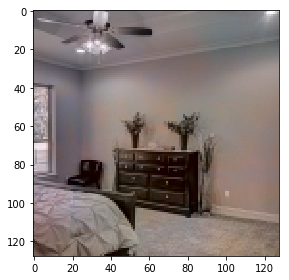

In [186]:
imshow(lab2rgb(cur))

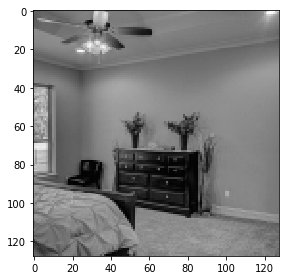

In [187]:
def predictImage(img):
    t = img_to_array(img)
    t =rgb2lab(1.0/255*t)[:,:,0]
    t = t.reshape(1,128,128,1)
    out = model.predict(t)
    out = out.reshape(1,128,128,2)
    out *= 128
    cur = np.zeros((128, 128, 3))
    cur[:,:,0] = t[0][:,:,0]
    cur[:,:,1:] = out[0]
    imshow(lab2rgb(cur))

In [190]:
im = load_img("test/data/10_128.jpg_bw.jpg")

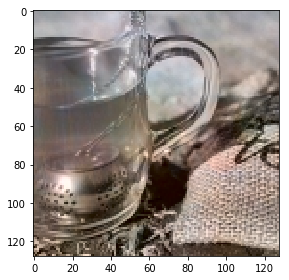

In [191]:
predictImage(im)